# <font color='red'> Nearest Neighbors

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

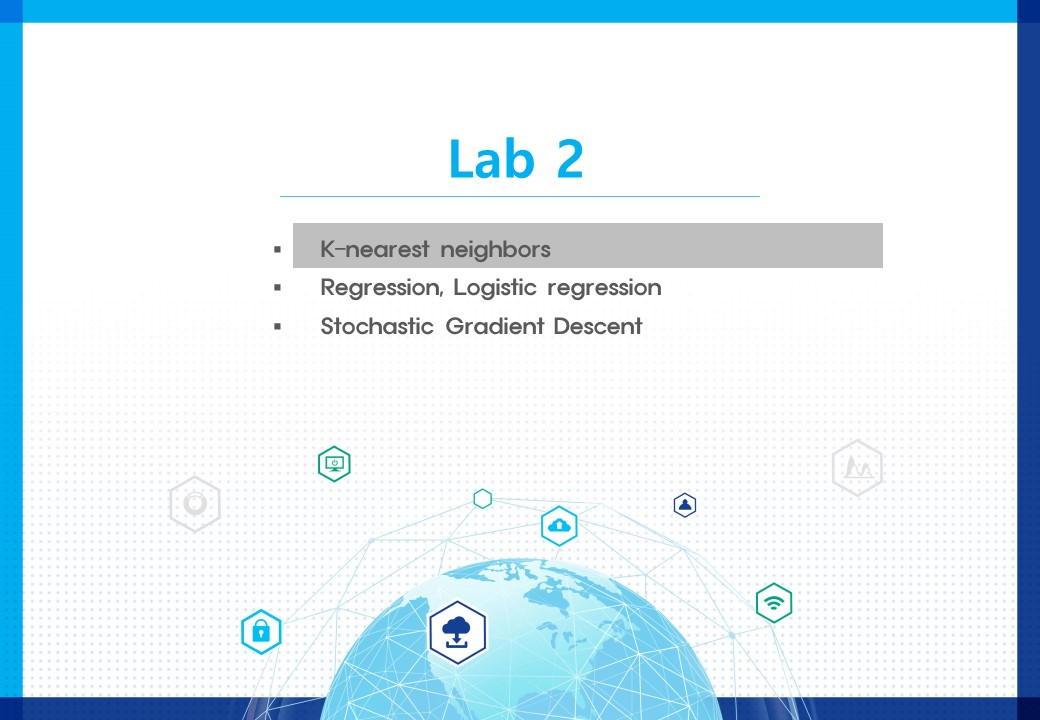

In [29]:
import os
os.chdir('D:/2021_데이터솔루션/발표자료/Python_데이터과학_머신러닝_20210823/')
from IPython.display import Image
width=800; height=500
Image(filename='슬라이드41.jpg', width=width, height=height)

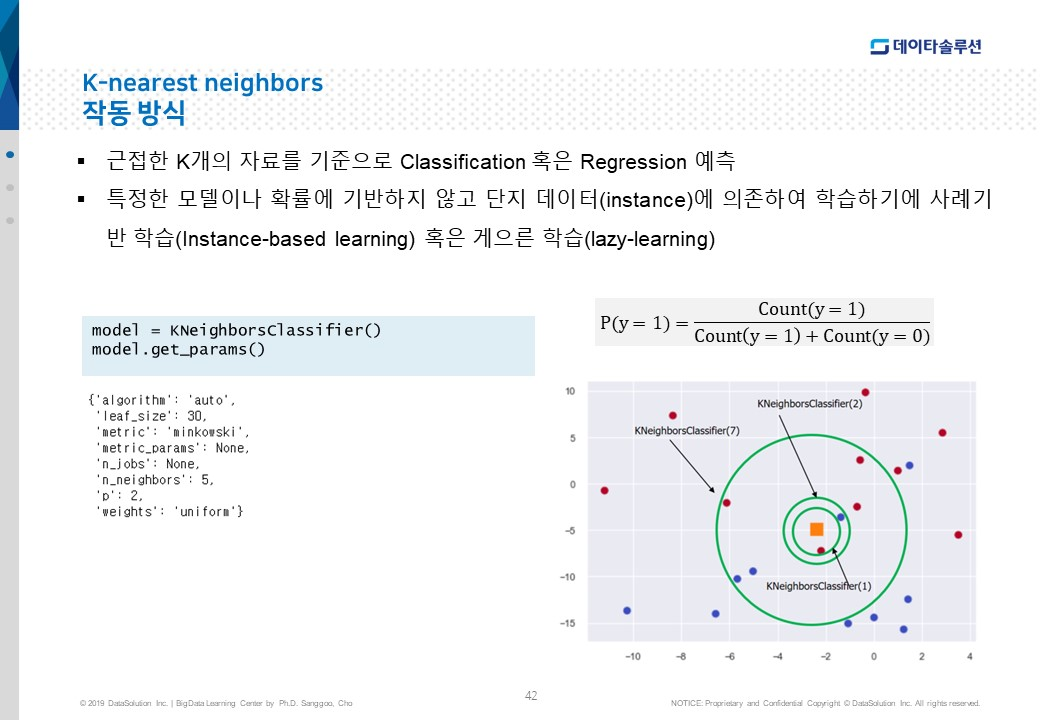

In [30]:
Image(filename='슬라이드42.jpg', width=width, height=height)

##  K-Nearest Neighbors Classification
### 1 Digits Classification Exercise
https://scikit-learn.org/stable/auto_examples/exercises/plot_digits_classification_exercise.html#sphx-glr-auto-examples-exercises-plot-digits-classification-exercise-py

In [4]:
from sklearn import datasets, neighbors, linear_model
from sklearn.neighbors import KNeighborsClassifier

X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

In [5]:
# # 나중에 비교해 볼 것
# from sklearn.preprocessing import StandardScaler
# sc_X = StandardScaler()
# X_digits = sc_X.fit_transform(X_digits,)

In [6]:
n_samples = len(X_digits)
cut_idx = int(.9 * n_samples)

X_train = X_digits[:cut_idx]
y_train = y_digits[:cut_idx]
X_test  = X_digits[cut_idx:]
y_test  = y_digits[cut_idx:]

knn      = neighbors.KNeighborsClassifier()
logistic = linear_model.LogisticRegression(max_iter=1000)

print(f'KNN score               : {knn.fit(X_train, y_train).score(X_test, y_test)}')
print(f'LogisticRegression score: {logistic.fit(X_train, y_train).score(X_test, y_test)}')

KNN score               : 0.9611111111111111
LogisticRegression score: 0.9333333333333333


In [7]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

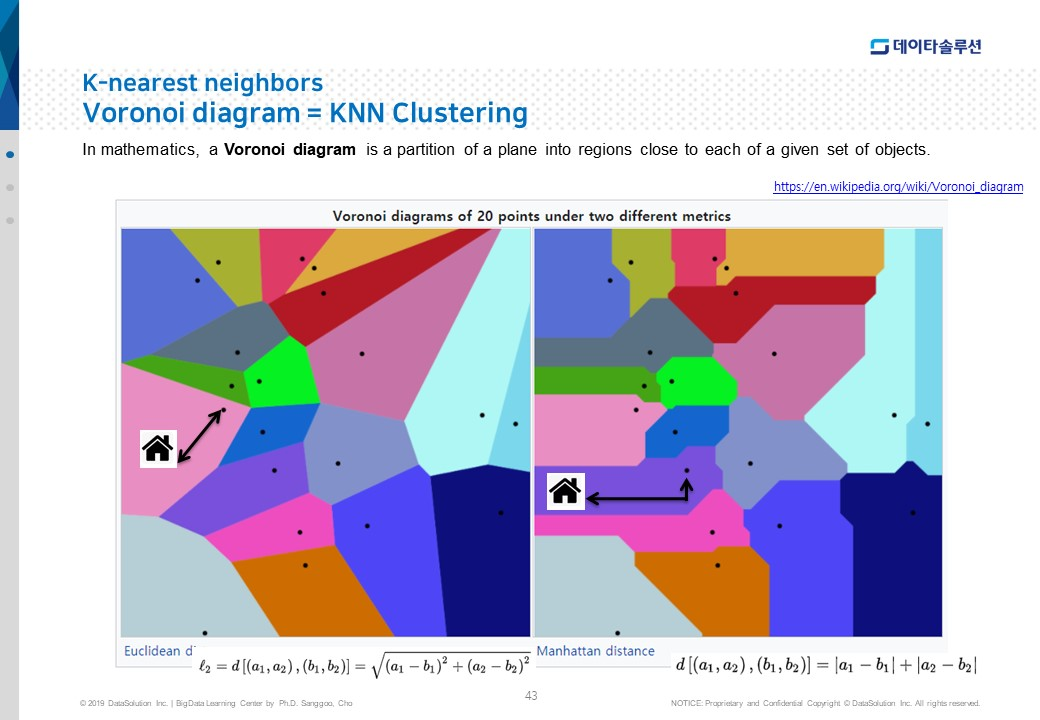

In [31]:
Image(filename='슬라이드43.jpg', width=width, height=height)

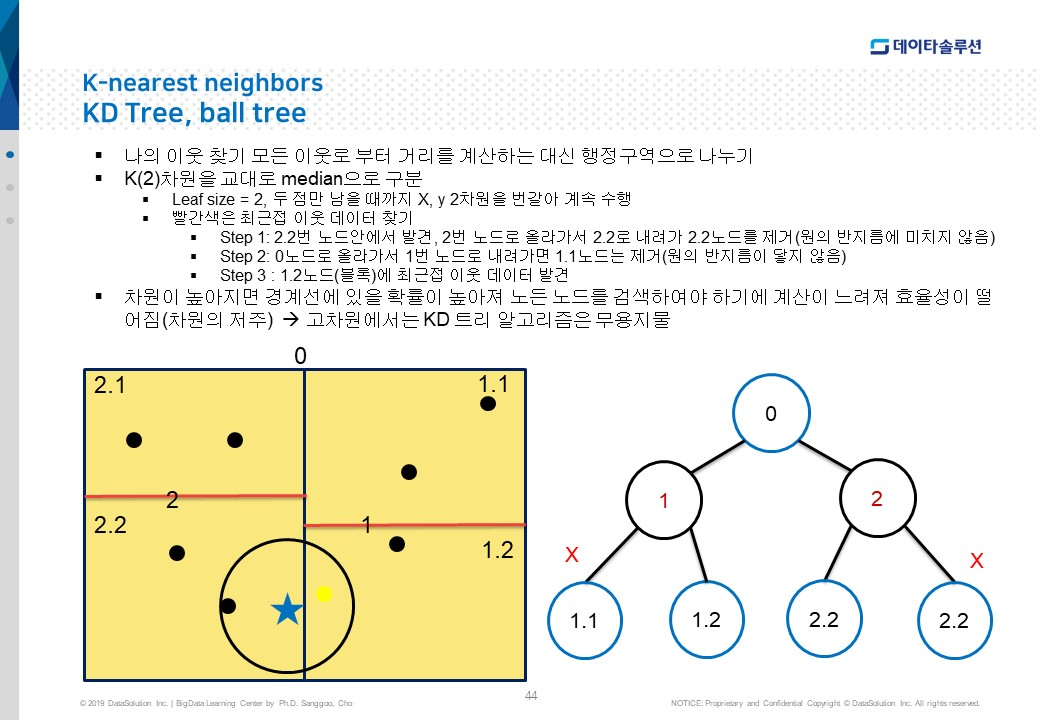

In [32]:
Image(filename='슬라이드44.jpg', width=width, height=height)

### 2 Step by Step Diabetes Classification-KNN-detailed
https://www.kaggle.com/shrutimechlearn/step-by-step-diabetes-classification-knn-detailed

In [8]:
#Loading the dataset
diabetes_data = pd.read_csv('../data/diabetes.csv')
#Print the first 5 rows of the dataframe.
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
def df_quailty(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull)': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

df_quailty(diabetes_data)

,데이터형태(dtypes),비 결측치 수(notnull),결측치 수(null),고유값 수(nunique)
Pregnancies,int64,768,0,17
Glucose,int64,768,0,136
BloodPressure,int64,768,0,47
SkinThickness,int64,768,0,51
Insulin,int64,768,0,186
BMI,float64,768,0,248
DiabetesPedigreeFunction,float64,768,0,517
Age,int64,768,0,52
Outcome,int64,768,0,2


array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

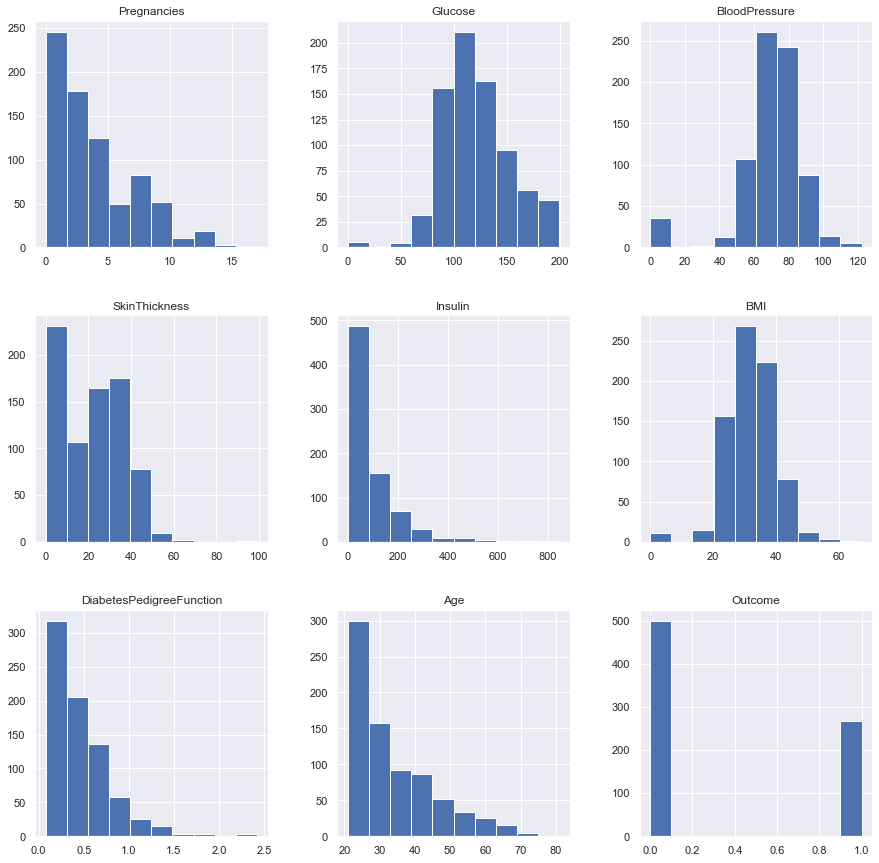

In [10]:
diabetes_data.hist(figsize = (15,15))

<AxesSubplot:>

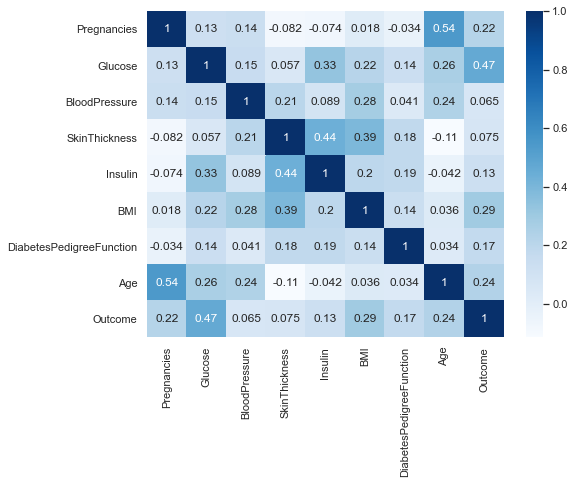

In [11]:
plt.figure(figsize=(8,6))  
sns.heatmap(diabetes_data.corr(), annot=True,cmap ='Blues')  

#### heatmap 대신 간단히 사용할 수 있는 방법

In [12]:
diabetes_data.corr().style.background_gradient(cmap='Blues')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [13]:
X = diabetes_data.drop(["Outcome"],axis = 1)
y = diabetes_data.Outcome

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, random_state=11)

from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=11)

#### randomized search

In [15]:
from sklearn.model_selection import RandomizedSearchCV
param_dist= dict(n_neighbors = list(range(5,105, 2)),
                 weights     = ['uniform','distance'],
                 algorithm   = ['ball_tree', 'kd_tree'],
                 leaf_size   = list(range(5,50)))
np.random.seed(1357)

randomized = RandomizedSearchCV(KNeighborsClassifier(), 
                                param_distributions= param_dist, cv=kf,
                                n_iter=64, scoring= 'recall', verbose=True)
randomized.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=11, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=64,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'leaf_size': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15, 17,
                                                        19, 21, 23, 25, 27, 29,
                                                        31, 33, 35, 37, 39, 41,
                                                        43, 45, 47, 49, 51, 53,
                                                        55, 57, 59, 61, 6

In [16]:
print(f'optimal train score: {randomized.best_score_:.3f}') 
print(f'test score         : {randomized.score(X_test, y_test):.3f}')
print(f'optimal parameter  : {randomized.best_params_}')

optimal train score: 0.533
test score         : 0.444
optimal parameter  : {'weights': 'uniform', 'n_neighbors': 7, 'leaf_size': 49, 'algorithm': 'kd_tree'}


### <font color ='purple'> KNN 알고리즘은 instace의 거리를 기준으로 하기 떄문에 표준화가 좋은 결과로 이어지는 경우가 많음

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = pd.DataFrame(sc_X.fit_transform(diabetes_data.drop(["Outcome"],axis = 1),),
                 columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
                          'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = diabetes_data.Outcome

In [18]:
y.value_counts(normalize=True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y, random_state=11)

from sklearn.model_selection import KFold
kf = KFold(n_splits=3, shuffle=True, random_state=11)

#### randomized search

In [20]:
from sklearn.model_selection import RandomizedSearchCV
param_dist= dict(n_neighbors = list(range(5,105, 2)),
                 weights     = ['uniform','distance'],
                 algorithm   = ['ball_tree', 'kd_tree'],
                 leaf_size   = list(range(5,50)))
np.random.seed(1357)

randomized = RandomizedSearchCV(KNeighborsClassifier(), 
                                param_distributions= param_dist, cv=kf,
                                n_iter=64, scoring= 'recall', verbose=True)
randomized.fit(X_train, y_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=11, shuffle=True),
                   estimator=KNeighborsClassifier(), n_iter=64,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree'],
                                        'leaf_size': [5, 6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15, 16, 17, 18,
                                                      19, 20, 21, 22, 23, 24,
                                                      25, 26, 27, 28, 29, 30,
                                                      31, 32, 33, 34, ...],
                                        'n_neighbors': [5, 7, 9, 11, 13, 15, 17,
                                                        19, 21, 23, 25, 27, 29,
                                                        31, 33, 35, 37, 39, 41,
                                                        43, 45, 47, 49, 51, 53,
                                                        55, 57, 59, 61, 6

In [21]:
print(f'optimal train score: {randomized.best_score_:.3f}') 
print(f'test score         : {randomized.score(X_test, y_test):.3f}')
print(f'optimal parameter  : {randomized.best_params_}')

optimal train score: 0.533
test score         : 0.537
optimal parameter  : {'weights': 'uniform', 'n_neighbors': 7, 'leaf_size': 49, 'algorithm': 'kd_tree'}


In [22]:
results = pd.DataFrame(randomized.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_weights,param_n_neighbors,param_leaf_size,param_algorithm,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.010167,0.002554,0.022674,0.000501,distance,83,38,ball_tree,"{'weights': 'distance', 'n_neighbors': 83, 'le...",0.366197,0.309859,0.222222,0.299426,0.059239,47
1,0.007389,0.001235,0.020788,0.002075,distance,79,28,ball_tree,"{'weights': 'distance', 'n_neighbors': 79, 'le...",0.394366,0.281690,0.250000,0.308685,0.061951,45
2,0.008616,0.001682,0.022577,0.001567,distance,87,47,kd_tree,"{'weights': 'distance', 'n_neighbors': 87, 'le...",0.380282,0.281690,0.208333,0.290102,0.070449,48
3,0.007736,0.000738,0.030389,0.001731,uniform,77,43,kd_tree,"{'weights': 'uniform', 'n_neighbors': 77, 'lea...",0.352113,0.253521,0.222222,0.275952,0.055349,50
4,0.007706,0.000977,0.035934,0.007599,uniform,75,24,kd_tree,"{'weights': 'uniform', 'n_neighbors': 75, 'lea...",0.366197,0.239437,0.222222,0.275952,0.064199,50


In [23]:
results = pd.DataFrame(randomized.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]
results.sort_values('rank_test_score').round(4).head(10)

,params,mean_test_score,rank_test_score
50,"{'weights': 'uniform', 'n_neighbors': 7, 'leaf...",0.5331,1
19,"{'weights': 'uniform', 'n_neighbors': 7, 'leaf...",0.5331,1
6,"{'weights': 'distance', 'n_neighbors': 5, 'lea...",0.5285,3
17,"{'weights': 'distance', 'n_neighbors': 9, 'lea...",0.5285,3
12,"{'weights': 'distance', 'n_neighbors': 7, 'lea...",0.5284,5
57,"{'weights': 'uniform', 'n_neighbors': 11, 'lea...",0.5007,6
47,"{'weights': 'distance', 'n_neighbors': 13, 'le...",0.4960,7
20,"{'weights': 'distance', 'n_neighbors': 27, 'le...",0.4584,8
42,"{'weights': 'uniform', 'n_neighbors': 25, 'lea...",0.4584,8
53,"{'weights': 'uniform', 'n_neighbors': 25, 'lea...",0.4584,8


              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



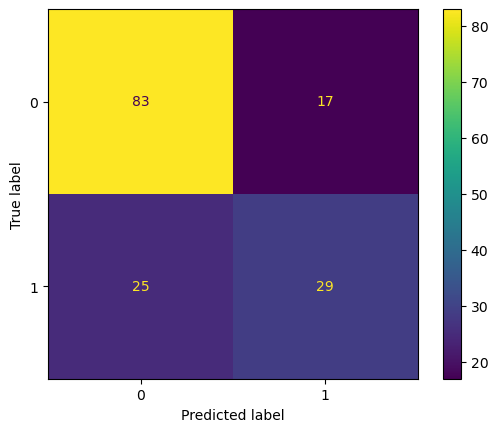

In [24]:
from sklearn.metrics import plot_confusion_matrix, classification_report
sns.reset_defaults()
plot_confusion_matrix(randomized, X_test, y_test)
y_pred = randomized.predict(X_test)
print(classification_report(y_test, y_pred))

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

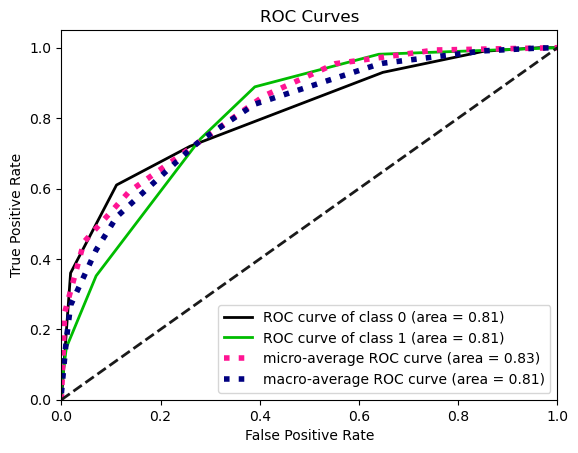

In [25]:
import scikitplot as skplt 
y_probas = randomized.predict_proba(X_test)
skplt.metrics.plot_roc(y_test, y_probas)

<AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>

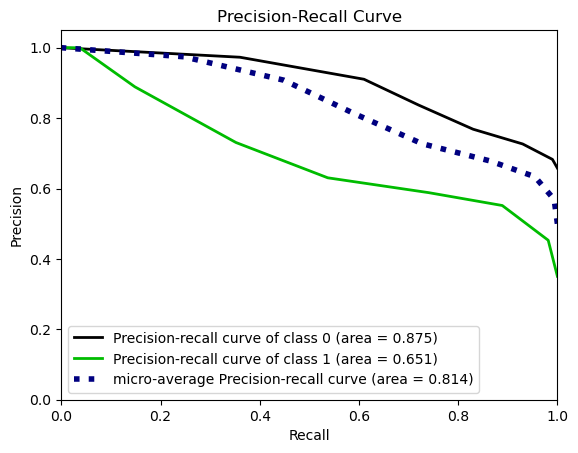

In [26]:
skplt.metrics.plot_precision_recall(y_test, y_probas)

## K-Nearest Neighbors Regression
### n_neighbors가 적을수록 과적합(overfitting) 가능성이 높아짐
https://scikit-learn.org/stable/auto_examples/neighbors/plot_regression.html

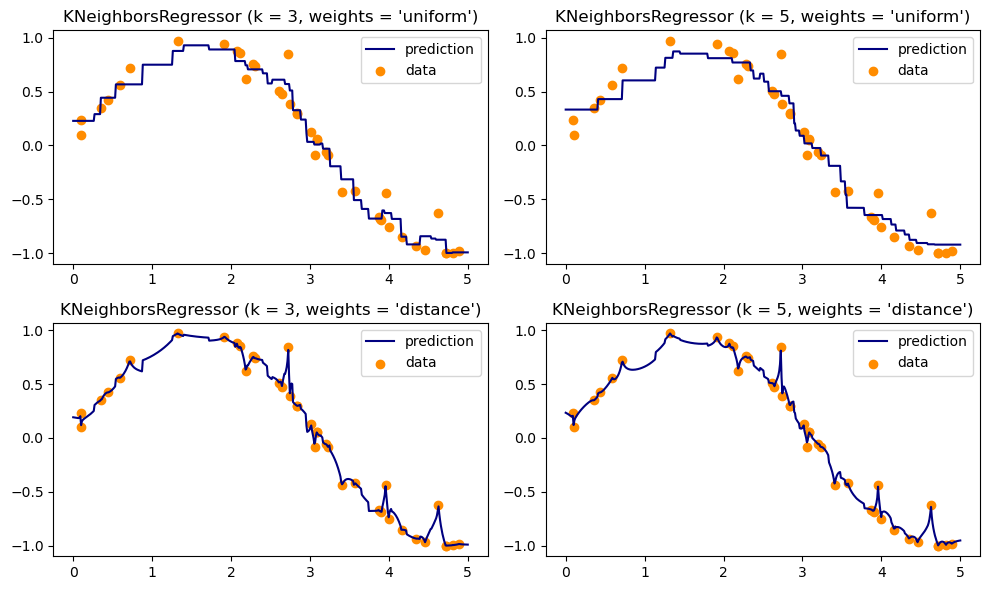

In [27]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500).reshape(-1,1)
y = np.sin(X).reshape(-1,)

# noise 넣기
y[::5] += (0.5 - np.random.rand(8))


# neighbour 개수와 weight 변화시키며 regression model 적합 결과
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

for i, weights in enumerate(['uniform', 'distance']):
    for j, n_neighbors in enumerate([3, 5]):
        knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
        y_ = knn.fit(X, y).predict(T)

        axes[i,j].scatter(X, y, color='darkorange', label='data')
        axes[i,j].plot(T, y_, color='navy', label='prediction')
        axes[i,j].axis('tight')
        axes[i,j].legend()
        axes[i,j].title.set_text(f"KNeighborsRegressor (k = {n_neighbors}, weights = '{weights}')")

plt.tight_layout()
plt.show()

## KNN Imputer
#### 가까운 주변값 두개의 평균으로 Null 값 채우기

In [28]:
from sklearn.impute import KNNImputer
X = [[1, 2, np.nan], [3, 4, 3], [np.nan, 6, 5], [8, 8, 7]]
X
imputer = KNNImputer(n_neighbors=2)
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

# End

In [43]:
y[::5]

array([ 0.23430296,  0.71991826,  0.61790585,  0.84495547, -0.08574159,
       -0.43496758, -0.43950071, -0.62536624])

## Data Generation

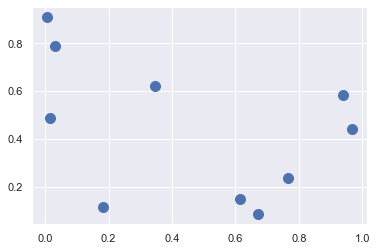

In [4]:
import random
random.seed(1234)
X = np.array([random.random() for i in range(20)])
X = X.reshape(10,2)
plt.scatter(X[:, 0], X[:, 1], s=100);

## 1. Unsupervised K-Nearest Neighbors
https://scikit-learn.org/stable/modules/neighbors.html

In [5]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(X)
distances, indices = nbrs.kneighbors(X)
distances
indices

array([[0, 2, 4],
       [1, 5, 9],
       [2, 0, 4],
       [3, 7, 4],
       [4, 7, 3],
       [5, 1, 9],
       [6, 5, 9],
       [7, 3, 4],
       [8, 9, 7],
       [9, 5, 6]], dtype=int64)

In [6]:
nbrs.kneighbors_graph(X).toarray()

array([[1., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [1., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.],
       [0., 0., 0., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 0., 0., 1.]])

## Hyperparameters 
https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html

In [7]:
nbrs.get_params()

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'radius': 1.0}

### n_neighbors = 1 로 하면 Overfitting

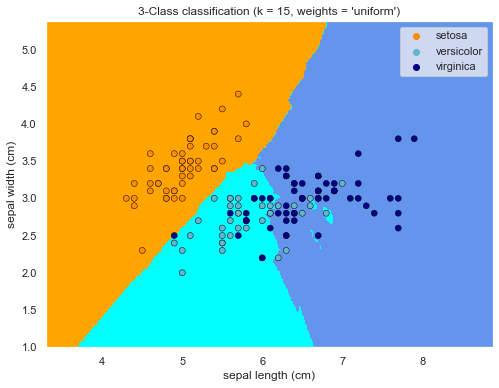

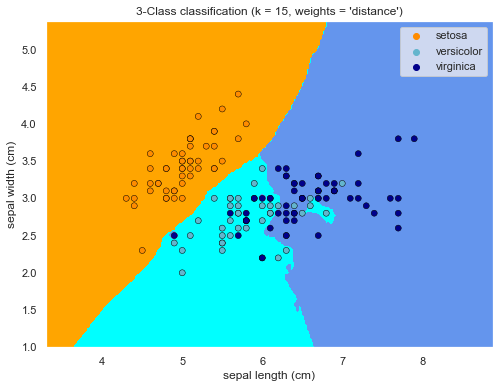

In [8]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=iris.target_names[y],
                    palette=cmap_bold, alpha=1.0, edgecolor="black")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title(f"3-Class classification (k = {n_neighbors}, weights = '{weights}')")
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])

plt.show()